In [43]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import requests

In [15]:
us_stat = pd.read_csv('../data/us_stat.csv')

In [16]:
us_stat.dropna().shape

(595, 23)

In [17]:
us_stat[(us_stat.fury == 1) | (us_stat.riot == 1)].groupby('Name').count()

,Unnamed: 0,Unnamed: 0.1,Team,Number,Goal,GPG,Assist,APG,Block,BPG,...,Games,Tournament,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
Name,,,,,,,,,,,,,,,,,,,,,
ABBY CHRISTOPHER,2,2,2,2,2,2,2,2,0,0,...,2,2,2,2,2,2,2,2,2,2
ALDEN FLETCHER,9,9,9,8,9,9,9,9,2,2,...,9,9,9,8,9,9,9,9,9,9
ALEX SNYDER,9,9,9,8,9,9,9,9,2,2,...,9,9,9,8,9,9,9,9,9,9
ALICIA BARR,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
ALICIA DANTZKER,7,7,7,6,7,7,7,7,2,2,...,7,7,7,6,7,7,7,7,7,7
ALICIA WHITE,2,2,2,2,2,2,2,2,0,0,...,2,2,2,2,2,2,2,2,2,2
ALYSSA WEATHERFORD,8,8,8,7,8,8,8,8,2,2,...,8,8,8,7,8,8,8,8,8,8
ANDREA ROMANO,5,5,5,4,5,5,5,5,0,0,...,5,5,5,4,5,5,5,5,5,5
ANGELICA BOYDEN,7,7,7,7,7,7,7,7,3,3,...,7,7,7,7,7,7,7,7,7,7


In [18]:
us_stat = us_stat.iloc[:,2:]

In [19]:
us_stat.head()

,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,...,Games,Tournament,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
0,BENT,0,AKINA YOUNGE,3,0.428571,1,0.142857,NaN,NaN,NaN,...,7,2011 USAU Club Championships,16,0.858,0,0,0,0,0,2011
1,BENT,1,NAOMI BRENDER,0,0.000000,0,0.000000,NaN,NaN,NaN,...,7,2011 USAU Club Championships,16,0.858,0,0,0,0,0,2011
2,BENT,2,KAREN CHALIF,4,0.571429,1,0.142857,NaN,NaN,NaN,...,7,2011 USAU Club Championships,16,0.858,0,0,0,0,0,2011
3,BENT,7,ANNE SILVER,0,0.000000,0,0.000000,NaN,NaN,NaN,...,7,2011 USAU Club Championships,16,0.858,0,0,0,0,0,2011
4,BENT,8,MARISA WESTHEIMER,1,0.142857,1,0.142857,NaN,NaN,NaN,...,7,2011 USAU Club Championships,16,0.858,0,0,0,0,0,2011


In [939]:
us_stat[(us_stat.wg13 ==1) & (us_stat.Name == 'ROHRE TITCOMB') & (us_stat.year <= 2013)].mean()

Unnamed: 0         673.750000
Number               4.000000
Goal                 0.250000
GPG                  0.027778
Assist               2.750000
APG                  0.309028
Block                2.000000
BPG                  0.226852
Turn                 6.666667
TPG                  0.750000
Games                8.000000
Standing             2.250000
Spirit               0.819344
wg13                 1.000000
wugc16_tryouts       1.000000
Team_WUGC16          1.000000
fury                 0.000000
riot                 1.000000
year              2012.250000
dtype: float64

In [940]:
us_stat[us_stat.wg13 ==1].describe()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
count,68.000000,63.000000,68.000000,68.000000,68.000000,68.000000,21.000000,21.000000,21.000000,21.000000,68.000000,68.000000,57.000000,68,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1073.926471,12.793651,4.955882,0.712681,8.352941,1.169088,5.476190,0.707672,10.142857,1.280707,7.147059,2.455882,0.743592,1,0.779412,0.779412,0.411765,0.264706,2013.220588
std,645.062957,10.604562,4.230076,0.592417,6.910439,0.837234,3.944858,0.519413,7.288935,0.900505,2.313263,2.140120,0.099256,0,0.417726,0.417726,0.495812,0.444457,1.219807
min,109.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.550000,1,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,568.250000,4.500000,2.000000,0.276786,3.000000,0.553571,3.000000,0.333333,5.000000,0.571429,6.000000,1.000000,0.680000,1,1.000000,1.000000,0.000000,0.000000,2012.750000
50%,999.000000,9.000000,4.000000,0.571429,7.500000,1.055556,5.000000,0.625000,8.000000,1.000000,7.000000,2.000000,0.771500,1,1.000000,1.000000,0.000000,0.000000,2013.000000
75%,1570.500000,18.500000,7.000000,1.020833,11.250000,1.584821,7.000000,1.000000,15.000000,2.000000,8.000000,3.000000,0.828000,1,1.000000,1.000000,1.000000,1.000000,2014.000000
max,2436.000000,37.000000,19.000000,3.000000,32.000000,3.333333,15.000000,2.142857,27.000000,3.000000,12.000000,12.000000,0.900000,1,1.000000,1.000000,1.000000,1.000000,2015.000000


In [941]:
# avg stats for fury
us_stat[us_stat.fury ==1].describe()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
count,227.000000,203.000000,227.000000,227.000000,227.000000,227.000000,50.000000,50.000000,50.000000,50.000000,227.000000,227.000000,203.000000,227.000000,227.000000,227.000000,227,227,227.000000
mean,1169.541850,24.467980,4.030837,0.555861,4.017621,0.553860,2.620000,0.332381,4.440000,0.568889,7.303965,1.911894,0.716540,0.123348,0.440529,0.259912,1,0,2013.449339
std,669.389658,20.359704,3.470982,0.527395,4.326257,0.542630,2.328966,0.300390,2.851137,0.376436,2.757152,0.735442,0.101452,0.329563,0.497548,0.439555,0,0,1.244754
min,107.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.550000,0.000000,0.000000,0.000000,1,0,2011.000000
25%,661.500000,9.500000,1.000000,0.222222,1.000000,0.142857,1.000000,0.111111,2.000000,0.285714,7.000000,1.000000,0.600000,0.000000,0.000000,0.000000,1,0,2013.000000
50%,1203.000000,18.000000,3.000000,0.500000,3.000000,0.428571,2.000000,0.285714,5.000000,0.555556,7.000000,2.000000,0.680000,0.000000,0.000000,0.000000,1,0,2014.000000
75%,1660.500000,33.000000,6.000000,0.750000,6.000000,0.833333,4.000000,0.555556,6.000000,0.714286,8.000000,2.000000,0.820625,0.000000,1.000000,1.000000,1,0,2014.000000
max,2277.000000,91.000000,16.000000,4.000000,32.000000,3.000000,8.000000,1.000000,12.000000,1.714286,12.000000,3.000000,0.828000,1.000000,1.000000,1.000000,1,0,2015.000000


In [942]:
# avg stats for riot
us_stat[us_stat.riot ==1].describe()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
count,228.000000,204.000000,228.000000,228.000000,228.000000,228.000000,76.000000,76.000000,76.000000,76.000000,228.000000,228.000000,204.000000,228.000000,228.000000,228.000000,228,228,228.000000
mean,1300.719298,21.921569,3.763158,0.559132,3.719298,0.553511,2.157895,0.273052,4.578947,0.574822,6.894737,2.021930,0.764186,0.078947,0.390351,0.210526,0,1,2013.495614
std,680.241477,22.772893,3.871966,0.580094,4.006622,0.570076,2.326959,0.300442,3.930269,0.492850,2.232592,0.815301,0.093627,0.270250,0.488902,0.408579,0,0,1.243477
min,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.610000,0.000000,0.000000,0.000000,0,1,2011.000000
25%,860.750000,7.000000,1.000000,0.125000,1.000000,0.111111,0.000000,0.000000,2.000000,0.250000,7.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0,1,2013.000000
50%,1206.500000,14.000000,3.000000,0.428571,3.000000,0.428571,2.000000,0.222222,4.000000,0.444444,7.000000,2.000000,0.714000,0.000000,0.000000,0.000000,0,1,2014.000000
75%,1638.250000,24.250000,5.000000,0.857143,6.000000,0.857143,3.000000,0.375000,6.000000,0.714286,8.000000,3.000000,0.842875,0.000000,1.000000,0.000000,0,1,2014.000000
max,2456.000000,91.000000,19.000000,3.000000,25.000000,2.777778,10.000000,1.285714,18.000000,2.285714,9.000000,3.000000,0.888000,1.000000,1.000000,1.000000,0,1,2015.000000


In [943]:
# avg stats for all non-fury, non-riot, non-wg13 players
us_stat[(us_stat.fury == 0) & (us_stat.riot == 0) & (us_stat.wg13 == 0)].describe()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
count,1543.000000,1541.000000,1543.000000,1543.000000,1543.000000,1543.000000,460.000000,460.000000,460.000000,460.000000,1543.000000,1543.000000,1543.000000,1543,1543.000000,1543.000000,1543,1543,1543.000000
mean,1216.281918,23.105775,3.108879,0.491748,3.036941,0.482002,1.739130,0.251872,4.863043,0.710455,6.521711,8.163318,0.690718,0,0.136099,0.047959,0,0,2013.377835
std,735.741897,21.969574,3.395246,0.558733,3.845837,0.620735,1.805762,0.263285,4.771094,0.700519,1.259213,4.272104,0.130891,0,0.343004,0.213748,0,0,1.433960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.371500,0,0.000000,0.000000,0,0,2011.000000
25%,548.500000,8.000000,1.000000,0.125000,0.000000,0.000000,0.000000,0.000000,2.000000,0.250000,6.000000,5.000000,0.583500,0,0.000000,0.000000,0,0,2012.000000
50%,1312.000000,17.000000,2.000000,0.333333,2.000000,0.285714,1.000000,0.166667,4.000000,0.500000,7.000000,8.000000,0.693000,0,0.000000,0.000000,0,0,2014.000000
75%,1877.500000,28.000000,4.000000,0.714286,4.000000,0.666667,3.000000,0.333333,7.000000,1.000000,7.000000,12.000000,0.800000,0,0.000000,0.000000,0,0,2015.000000
max,2429.000000,99.000000,22.000000,4.400000,30.000000,4.250000,10.000000,1.500000,39.000000,6.500000,9.000000,16.000000,0.914000,0,1.000000,1.000000,0,0,2015.000000


In [944]:
fury_avg = pd.DataFrame(us_stat[(us_stat.Team == 'FURY') & (us_stat.year <= 2013)].mean())

In [945]:
riot_avg = pd.DataFrame(us_stat[(us_stat.Team == 'RIOT') & (us_stat.year <= 2013)].mean())

In [946]:
# TEAM USA stats may be affected by small roster (more PT and opps for stats) so wg_avg take mean stats from only club teams
wg_avg = pd.DataFrame(us_stat[(us_stat.wg13 == 1) & (us_stat.Team != 'TEAM USA') & (us_stat.year <= 2013)].mean())

In [947]:
showdown_avg = pd.DataFrame(us_stat[(us_stat.Team == 'SHOWDOWN') & (us_stat.year <= 2013)].mean())

In [948]:
heist_avg = pd.DataFrame(us_stat[(us_stat.Team == 'HEIST') & (us_stat.year <= 2013)].mean())

In [949]:
scandal_avg = pd.DataFrame(us_stat[(us_stat.Team == 'SCANDAL') & (us_stat.year <= 2013)].mean())

In [950]:
all_avg = pd.DataFrame(us_stat[us_stat.year <= 2013].mean())

In [951]:
team_avg = pd.concat({'FURY':fury_avg, 'RIOT': riot_avg, 'WG13':wg_avg, 'SHOWDOWN':showdown_avg, 'HEIST':heist_avg, 'SCANDAL':scandal_avg, 'ALL':all_avg}, axis=1)

In [952]:
team_avg = team_avg[['WG13', 'FURY', 'RIOT', 'HEIST', 'SHOWDOWN', 'SCANDAL', 'ALL']]

In [953]:
team_avg

,WG13,FURY,RIOT,HEIST,SHOWDOWN,SCANDAL,ALL
,0,0,0,0,0,0,0
Unnamed: 0,618.484848,538.940594,697.171717,693.500000,756.108696,729.043011,550.920168
Number,13.454545,24.039604,21.646465,31.208333,27.478261,24.483871,23.712185
Goal,5.969697,5.297030,4.353535,2.541667,3.989130,4.462366,3.492647
GPG,0.709536,0.581880,0.545435,0.423611,0.499159,0.545315,0.466049
Assist,10.363636,5.316832,4.323232,2.583333,3.956522,4.440860,3.481092
APG,1.219156,0.584217,0.541787,0.430556,0.495234,0.542584,0.464646
Block,5.476190,2.620000,2.157895,1.833333,2.191176,3.072464,1.959664
BPG,0.707672,0.332381,0.273052,0.305556,0.288603,0.374971,0.273009
Turn,10.142857,4.440000,4.578947,5.250000,5.838235,5.565217,4.942857


In [954]:
#avg stats for wg players from club
us_stat[(us_stat.wg13 == 1) & (us_stat.Team != 'TEAM USA')].mean()

Unnamed: 0        1122.258065
Number              12.807018
Goal                 5.000000
GPG                  0.709069
Assist               8.887097
APG                  1.236527
Block                5.476190
BPG                  0.707672
Turn                10.142857
TPG                  1.280707
Games                7.258065
Standing             2.596774
Spirit               0.743592
wg13                 1.000000
wugc16_tryouts       0.790323
Team_WUGC16          0.790323
fury                 0.451613
riot                 0.290323
year              2013.241935
dtype: float64

In [955]:
wg_avg_compare = pd.concat({'WG_stat':pd.DataFrame(us_stat[us_stat.Team == 'TEAM USA'].mean()), 'Club_stat':pd.DataFrame(us_stat[(us_stat.wg13 == 1) & (us_stat.Team != 'TEAM USA')].mean())}, axis=1)

In [956]:
# players on WG13 team were statistically more productive on their club teams than on WG13
wg_avg_compare

,Club_stat,WG_stat
,0,0
Unnamed: 0,1122.258065,574.500000
Number,12.807018,12.666667
Goal,5.000000,4.500000
GPG,0.709069,0.750000
Assist,8.887097,2.833333
APG,1.236527,0.472222
Block,5.476190,NaN
BPG,0.707672,NaN
Turn,10.142857,NaN


In [957]:
print 'Players had ' + str(0.771795/0.750000) + ' times more goals per game (GPG) on club teams'
print 'Players had ' + str(1.211009/0.472222) + ' times more assists per game (APG) on club teams'

Players had 1.02906 times more goals per game (GPG) on club teams
Players had 2.56449085388 times more assists per game (APG) on club teams


**Conclusion:** Seems that players are more evenly matched on all-star teams and therefore do not stand out statistically. Better to train on avg statistical profile using club stats than WG stats since we're comparing them to others in the club division.

In [958]:
# their stats compared to their teammates?
# get individual averages of WG players from club when us_stat.year <= 2013

individual_stats = {}
for item in us_stat[us_stat.wg13 == 1].Name:
    if item not in individual_stats:
        individual_stats[str(item).replace(' ','')] = us_stat[(us_stat.Name == str(item)) & (us_stat.Team != 'TEAM USA') & (us_stat.year <= 2013)].mean()
        
# player_stats[(player_stats.Name == 'SARAH GRIFFITH') & (player_stats.Team != 'TEAM USA')].mean()

In [959]:
individual_stats.keys()

['OCTAVIAPAYNE',
 'CREEHOWARD',
 'ALEXSNYDER',
 'GEORGIABOSSCHER',
 'SARAHGRIFFITH',
 'ROHRETITCOMB',
 'SANDYJORGENSEN',
 'CARACROUCH',
 'ANNANAZAROV']

In [960]:
octavia = pd.DataFrame(individual_stats['OCTAVIAPAYNE'])
cree = pd.DataFrame(individual_stats['CREEHOWARD'])
alex = pd.DataFrame(individual_stats['ALEXSNYDER'])
georgia = pd.DataFrame(individual_stats['GEORGIABOSSCHER'])
sarah = pd.DataFrame(individual_stats['SARAHGRIFFITH'])
# rohre = pd.DataFrame(individual_stats['ROHRETITCOMB'])
#  excluding 2013 Club Championships (torn acl)
rohre = pd.DataFrame(us_stat[(us_stat.Name == 'ROHRE TITCOMB') & (us_stat.Team != 'TEAM USA') & (us_stat.year <= 2013) & (us_stat.Tournament != '2013 USAU Club Championships')].mean())
sandy = pd.DataFrame(individual_stats['SANDYJORGENSEN'])
cara = pd.DataFrame(individual_stats['CARACROUCH'])
anna = pd.DataFrame(individual_stats['ANNANAZAROV'])

In [961]:
indi_avg = pd.concat({'OCTAVIA_PAYNE':octavia, 'CREE_HOWARD': cree, 'ALEX_SNYDER':alex, 'GEORGIA_BOSSCHER':georgia, 'SARAH_GRIFFITH':sarah, 'ROHRE_TITCOMB':rohre, 'SANDY_JORGENSEN':sandy, 'CARA_CROUCH':cara, 'ANNA_NAZAROV':anna}, axis=1)

In [962]:
indi_avg

,ALEX_SNYDER,ANNA_NAZAROV,CARA_CROUCH,CREE_HOWARD,GEORGIA_BOSSCHER,OCTAVIA_PAYNE,ROHRE_TITCOMB,SANDY_JORGENSEN,SARAH_GRIFFITH
,0,0,0,0,0,0,0,0,0
Unnamed: 0,524.750000,679.666667,742.500000,532.250000,387.000000,713.750000,613.666667,586.333333,675.750000
Number,4.000000,33.000000,8.250000,13.000000,19.000000,9.000000,4.000000,37.000000,6.000000
Goal,3.000000,4.333333,4.750000,10.000000,7.666667,4.000000,0.333333,11.000000,10.000000
GPG,0.345734,0.518519,0.595238,1.074405,0.833333,0.505952,0.037037,1.395503,1.244048
Assist,20.250000,5.000000,18.250000,4.250000,8.333333,15.500000,3.666667,7.000000,9.250000
APG,2.167163,0.523810,2.266369,0.452381,0.902778,1.902778,0.412037,0.896164,1.218254
Block,6.000000,4.000000,4.000000,2.500000,6.000000,10.000000,3.000000,11.500000,4.333333
BPG,0.777778,0.555556,0.529762,0.325397,1.000000,1.195767,0.340278,1.515873,0.551587
Turn,10.500000,6.000000,16.666667,4.500000,15.000000,19.000000,10.000000,6.000000,5.666667


In [963]:
compare_stats = pd.concat([indi_avg, team_avg], axis=1)

In [964]:
compare_stats

,ALEX_SNYDER,ANNA_NAZAROV,CARA_CROUCH,CREE_HOWARD,GEORGIA_BOSSCHER,OCTAVIA_PAYNE,ROHRE_TITCOMB,SANDY_JORGENSEN,SARAH_GRIFFITH,WG13,FURY,RIOT,HEIST,SHOWDOWN,SCANDAL,ALL
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unnamed: 0,524.750000,679.666667,742.500000,532.250000,387.000000,713.750000,613.666667,586.333333,675.750000,618.484848,538.940594,697.171717,693.500000,756.108696,729.043011,550.920168
Number,4.000000,33.000000,8.250000,13.000000,19.000000,9.000000,4.000000,37.000000,6.000000,13.454545,24.039604,21.646465,31.208333,27.478261,24.483871,23.712185
Goal,3.000000,4.333333,4.750000,10.000000,7.666667,4.000000,0.333333,11.000000,10.000000,5.969697,5.297030,4.353535,2.541667,3.989130,4.462366,3.492647
GPG,0.345734,0.518519,0.595238,1.074405,0.833333,0.505952,0.037037,1.395503,1.244048,0.709536,0.581880,0.545435,0.423611,0.499159,0.545315,0.466049
Assist,20.250000,5.000000,18.250000,4.250000,8.333333,15.500000,3.666667,7.000000,9.250000,10.363636,5.316832,4.323232,2.583333,3.956522,4.440860,3.481092
APG,2.167163,0.523810,2.266369,0.452381,0.902778,1.902778,0.412037,0.896164,1.218254,1.219156,0.584217,0.541787,0.430556,0.495234,0.542584,0.464646
Block,6.000000,4.000000,4.000000,2.500000,6.000000,10.000000,3.000000,11.500000,4.333333,5.476190,2.620000,2.157895,1.833333,2.191176,3.072464,1.959664
BPG,0.777778,0.555556,0.529762,0.325397,1.000000,1.195767,0.340278,1.515873,0.551587,0.707672,0.332381,0.273052,0.305556,0.288603,0.374971,0.273009
Turn,10.500000,6.000000,16.666667,4.500000,15.000000,19.000000,10.000000,6.000000,5.666667,10.142857,4.440000,4.578947,5.250000,5.838235,5.565217,4.942857


In [965]:
compare_stats.to_csv('compare_stats.csv', sep=',', encoding='utf-8')

In [966]:
compare_stats.columns

MultiIndex(levels=[[u'ALEX_SNYDER', u'ALL', u'ANNA_NAZAROV', u'CARA_CROUCH', u'CREE_HOWARD', u'FURY', u'GEORGIA_BOSSCHER', u'HEIST', u'OCTAVIA_PAYNE', u'RIOT', u'ROHRE_TITCOMB', u'SANDY_JORGENSEN', u'SARAH_GRIFFITH', u'SCANDAL', u'SHOWDOWN', u'WG13'], [0]],
           labels=[[0, 2, 3, 4, 6, 8, 10, 11, 12, 15, 5, 9, 7, 14, 13, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [967]:
compare_stats = compare_stats[['FURY', 'ALEX_SNYDER', 'ANNA_NAZAROV', 'CREE_HOWARD',
                              'RIOT', 'ROHRE_TITCOMB', 'SARAH_GRIFFITH',
                              'SCANDAL', 'OCTAVIA_PAYNE', 'SANDY_JORGENSEN',
                              'SHOWDOWN', 'CARA_CROUCH',
                              'HEIST', 'GEORGIA_BOSSCHER',
                              'ALL', 'WG13']]

In [968]:
compare_stats

,FURY,ALEX_SNYDER,ANNA_NAZAROV,CREE_HOWARD,RIOT,ROHRE_TITCOMB,SARAH_GRIFFITH,SCANDAL,OCTAVIA_PAYNE,SANDY_JORGENSEN,SHOWDOWN,CARA_CROUCH,HEIST,GEORGIA_BOSSCHER,ALL,WG13
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unnamed: 0,538.940594,524.750000,679.666667,532.250000,697.171717,613.666667,675.750000,729.043011,713.750000,586.333333,756.108696,742.500000,693.500000,387.000000,550.920168,618.484848
Number,24.039604,4.000000,33.000000,13.000000,21.646465,4.000000,6.000000,24.483871,9.000000,37.000000,27.478261,8.250000,31.208333,19.000000,23.712185,13.454545
Goal,5.297030,3.000000,4.333333,10.000000,4.353535,0.333333,10.000000,4.462366,4.000000,11.000000,3.989130,4.750000,2.541667,7.666667,3.492647,5.969697
GPG,0.581880,0.345734,0.518519,1.074405,0.545435,0.037037,1.244048,0.545315,0.505952,1.395503,0.499159,0.595238,0.423611,0.833333,0.466049,0.709536
Assist,5.316832,20.250000,5.000000,4.250000,4.323232,3.666667,9.250000,4.440860,15.500000,7.000000,3.956522,18.250000,2.583333,8.333333,3.481092,10.363636
APG,0.584217,2.167163,0.523810,0.452381,0.541787,0.412037,1.218254,0.542584,1.902778,0.896164,0.495234,2.266369,0.430556,0.902778,0.464646,1.219156
Block,2.620000,6.000000,4.000000,2.500000,2.157895,3.000000,4.333333,3.072464,10.000000,11.500000,2.191176,4.000000,1.833333,6.000000,1.959664,5.476190
BPG,0.332381,0.777778,0.555556,0.325397,0.273052,0.340278,0.551587,0.374971,1.195767,1.515873,0.288603,0.529762,0.305556,1.000000,0.273009,0.707672
Turn,4.440000,10.500000,6.000000,4.500000,4.578947,10.000000,5.666667,5.565217,19.000000,6.000000,5.838235,16.666667,5.250000,15.000000,4.942857,10.142857


In [969]:
compare_stats.T.sort_values(by='TPG')

,,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
CREE_HOWARD,0,532.250000,13.000000,10.000000,1.074405,4.250000,0.452381,2.500000,0.325397,4.500000,0.563492,9.000000,1.500000,0.769156,1.000000,0.000000,0.000000,1.000000,0.000000,2012.250000
FURY,0,538.940594,24.039604,5.297030,0.581880,5.316832,0.584217,2.620000,0.332381,4.440000,0.568889,9.108911,1.524752,0.762967,0.128713,0.425743,0.257426,1.000000,0.000000,2012.267327
RIOT,0,697.171717,21.646465,4.353535,0.545435,4.323232,0.541787,2.157895,0.273052,4.578947,0.574822,7.969697,2.282828,0.822125,0.080808,0.323232,0.191919,0.000000,1.000000,2012.292929
SCANDAL,0,729.043011,24.483871,4.462366,0.545315,4.440860,0.542584,3.072464,0.374971,5.565217,0.662986,8.204301,3.279570,0.778817,0.075269,0.215054,0.150538,0.000000,0.000000,2012.268817
SARAH_GRIFFITH,0,675.750000,6.000000,10.000000,1.244048,9.250000,1.218254,4.333333,0.551587,5.666667,0.695106,8.000000,2.250000,0.819344,1.000000,1.000000,1.000000,0.000000,1.000000,2012.250000
ALL,0,550.920168,23.712185,3.492647,0.466049,3.481092,0.464646,1.959664,0.273009,4.942857,0.699493,7.435924,6.748950,0.790848,0.040966,0.176471,0.096639,0.106092,0.103992,2012.127101
SANDY_JORGENSEN,0,586.333333,37.000000,11.000000,1.395503,7.000000,0.896164,11.500000,1.515873,6.000000,0.746032,8.000000,3.666667,0.800000,1.000000,1.000000,1.000000,0.000000,0.000000,2012.000000
SHOWDOWN,0,756.108696,27.478261,3.989130,0.499159,3.956522,0.495234,2.191176,0.288603,5.838235,0.759716,7.989130,4.054348,0.805327,0.043478,0.086957,0.043478,0.000000,0.000000,2012.260870
ANNA_NAZAROV,0,679.666667,33.000000,4.333333,0.518519,5.000000,0.523810,4.000000,0.555556,6.000000,0.777778,9.333333,1.666667,0.749542,1.000000,1.000000,1.000000,1.000000,0.000000,2012.666667
HEIST,0,693.500000,31.208333,2.541667,0.423611,2.583333,0.430556,1.833333,0.305556,5.250000,0.875000,6.000000,12.000000,0.834000,0.041667,0.083333,0.083333,0.000000,0.000000,2013.000000


In [970]:
us_stat[us_stat.year <=2013].mean()

Unnamed: 0         550.920168
Number              23.712185
Goal                 3.492647
GPG                  0.466049
Assist               3.481092
APG                  0.464646
Block                1.959664
BPG                  0.273009
Turn                 4.942857
TPG                  0.699493
Games                7.435924
Standing             6.748950
Spirit               0.790848
wg13                 0.040966
wugc16_tryouts       0.176471
Team_WUGC16          0.096639
fury                 0.106092
riot                 0.103992
year              2012.127101
dtype: float64

In [971]:
# save df as csv
compare_stats.to_csv('compare_stats.csv', sep=',', encoding='utf-8')

In [972]:
# save df as csv
us_stat.to_csv('us_stat.csv', sep=',', encoding='utf-8')

In [973]:
# us_stat[(us_stat.Name == 'ROHRE TITCOMB') & (us_stat.year <= 2013) & (us_stat.Team != 'TEAM USA')].mean()

In [974]:
# us_stat[(us_stat.Name == 'ROHRE TITCOMB') & (us_stat.Team != 'TEAM USA') & (us_stat.year <= 2013) & (us_stat.Tournament != '2013 USAU Club Championships')].mean()

## KNN

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [20]:
knn_training_stats = us_stat[(us_stat.year <= 2013) & (us_stat.Team != 'TEAM USA')]

In [21]:
# knn_training_stats.sort_values(by='TPG', ascending=False)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [23]:
# assign X and y
feature_cols = ['APG', 'GPG', 'Goal', 'Assist', 'Standing']
X = knn_training_stats[feature_cols]
y = knn_training_stats.wg13

In [24]:
# train the model on the entire dataset
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [25]:
# predict the response values for the observations in X ("test the model")
# knn.predict(X)

In [26]:
# store the predicted response values
y_pred_class = knn.predict(X)

In [27]:
from sklearn import metrics
print metrics.accuracy_score(y, y_pred_class)

0.994714587738


In [28]:
# us_stat[(us_stat.year > 2013) & (us_stat.wugc16_tryouts == 1)].groupby('Name').mean()

In [29]:
X_test = us_stat[(us_stat.wugc16_tryouts == 1)]

In [47]:
Z = knn.predict(X_test[feature_cols])


In [31]:
X_test['wugc_predict'] = knn.predict(X_test[feature_cols])

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
X_test[X_test.wugc_predict == 1].groupby('Name').count()

,Team,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,...,Tournament,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,wugc_predict
Name,,,,,,,,,,,,,,,,,,,,,
ALEX SNYDER,6,6,6,6,6,6,2,2,2,2,...,6,6,5,6,6,6,6,6,6,6
ALYSSA WEATHERFORD,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
AMBER SINICROPE,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ANNA NAZAROV,2,2,2,2,2,2,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
BECKY MALINOWSKI,2,2,2,2,2,2,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
BRIANA CAHN,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
CLAIRE CHASTAIN,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
CLAIRE DESMOND,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
CLAIRE SHARMAN,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


TP = 19/29

# Decision Tree

Use all stats <= 2013 and wg == 1 to train decision tree, then feed all stats (2011-2015) to predict.

In [989]:
# all data up to and including 2013 for wg players, excluding WG stats
tree_training = us_stat[(us_stat.year <= 2013) & (us_stat.Team != 'TEAM USA')].groupby('Name').mean().dropna()

In [990]:
tree_training.head()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
Name,,,,,,,,,,,,,,,,,,,
ABBIE ROBERTS,304.5,3.0,1.0,0.142857,1.0,0.142857,0,0.000000,3,0.428571,7.0,8.0,0.7290,0,0,0,0,0,2011.5
ABBY VANMUIJEN,768.0,17.0,1.0,0.166667,2.0,0.333333,3,0.500000,3,0.500000,6.0,9.0,0.7340,0,0,0,0,0,2013.0
ADRIANNE SOO,1056.0,9.0,6.0,0.857143,0.0,0.000000,2,0.285714,1,0.142857,7.0,7.0,0.7275,0,0,0,0,0,2013.0
ADRIENNE BOVEE,919.0,16.0,0.0,0.000000,0.0,0.000000,0,0.000000,0,0.000000,6.0,15.0,0.8660,0,0,0,0,0,2013.0
AKINA YOUNGE,298.5,13.5,1.5,0.214286,2.5,0.404762,2,0.333333,3,0.500000,6.5,14.5,0.8290,0,0,0,0,0,2012.0


In [991]:
tree_training['bpg_prediction'] = tree_training.BPG.mean()

In [992]:
tree_training[['BPG','bpg_prediction']].head()

,BPG,bpg_prediction
Name,,
ABBIE ROBERTS,0.000000,0.258884
ABBY VANMUIJEN,0.500000,0.258884
ADRIANNE SOO,0.285714,0.258884
ADRIENNE BOVEE,0.000000,0.258884
AKINA YOUNGE,0.333333,0.258884


In [993]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np

In [994]:
np.sqrt(metrics.mean_squared_error(tree_training.BPG, tree_training.bpg_prediction))

0.26132026163514799

In [995]:
# define a function that calculates the RMSE for a given split of BPG
def bpg_split(bpg):
    lower_bpg_cat = tree_training[tree_training.BPG < bpg].wg13.mean()
    higher_bpg_cat = tree_training[tree_training.BPG >= bpg].wg13.mean()
    tree_training['bpg_prediction'] = np.where(tree_training.BPG < bpg, lower_bpg_cat, higher_bpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training.BPG, tree_training.bpg_prediction))

In [996]:
bpg_split(0.226852)

0.34244677424533687

In [997]:
tree_training.dtypes

Unnamed: 0        float64
Number            float64
Goal              float64
GPG               float64
Assist            float64
APG               float64
Block             float64
BPG               float64
Turn              float64
TPG               float64
Games             float64
Standing          float64
Spirit            float64
wg13              float64
wugc16_tryouts    float64
Team_WUGC16       float64
fury              float64
riot              float64
year              float64
bpg_prediction    float64
dtype: object

In [998]:
tree_training[tree_training.bpg_prediction >= 0.04]

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,bpg_prediction
Name,,,,,,,,,,,,,,,,,,,,
ABBY VANMUIJEN,768.000000,17.000000,1.000000,0.166667,2.000000,0.333333,3.000000,0.500000,3.000000,0.500000,6.000000,9.000000,0.734000,0,0,0,0.000000,0.00,2013.000000,0.043716
ADRIANNE SOO,1056.000000,9.000000,6.000000,0.857143,0.000000,0.000000,2.000000,0.285714,1.000000,0.142857,7.000000,7.000000,0.727500,0,0,0,0.000000,0.00,2013.000000,0.043716
AKINA YOUNGE,298.500000,13.500000,1.500000,0.214286,2.500000,0.404762,2.000000,0.333333,3.000000,0.500000,6.500000,14.500000,0.829000,0,0,0,0.000000,0.00,2012.000000,0.043716
ALDEN FLETCHER,538.000000,15.000000,8.500000,0.962302,1.500000,0.167659,4.000000,0.476190,5.000000,0.603175,9.000000,1.500000,0.769156,0,0,0,1.000000,0.00,2012.250000,0.043716
ALEX SNYDER,524.750000,4.000000,3.000000,0.345734,20.250000,2.167163,6.000000,0.777778,10.500000,1.309524,9.000000,1.500000,0.769156,1,1,1,1.000000,0.00,2012.250000,0.043716
ALICIA LAGASCA,467.000000,30.000000,8.000000,1.000000,4.000000,0.500000,2.000000,0.250000,3.000000,0.375000,8.000000,3.000000,0.826000,0,0,0,0.000000,0.00,2012.000000,0.043716
ALICIA WHITE,457.666667,45.333333,8.333333,0.873016,3.666667,0.484127,5.000000,0.714286,5.000000,0.714286,9.000000,1.333333,0.766667,0,0,0,0.666667,0.00,2012.000000,0.043716
ALIKA JOHNSTON,1144.000000,20.000000,2.000000,0.222222,4.000000,0.444444,3.000000,0.333333,4.000000,0.444444,9.000000,2.000000,0.711250,0,0,0,0.000000,0.00,2013.000000,0.043716
ALIKA JOHNSTON,894.000000,20.000000,8.000000,1.142857,4.000000,0.571429,2.000000,0.285714,2.000000,0.285714,7.000000,1.000000,0.872000,0,0,0,0.000000,0.00,2013.000000,0.043716


In [999]:
# check all possible BPG splits
BPG_range = np.arange(tree_training.BPG.min(), tree_training.BPG.max(), 0.0005)
RMSE = [bpg_split(bpg) for bpg in BPG_range]

In [1000]:
min(RMSE)

0.3306983482221067

In [1001]:
low_BGP = {}
for item in np.arange(tree_training.BPG.min(), tree_training.BPG.max(), 0.0005):
    low_BGP[bpg_split(item)] = item

In [1002]:
low_BGP[0.3306983482221067]

0.52949999999999997

In [1003]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

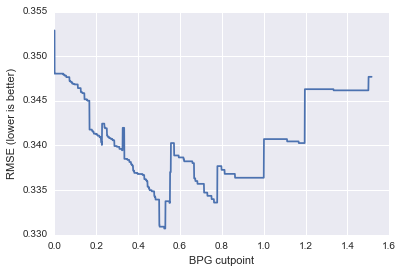

In [1004]:
# plot BPG cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(BPG_range, RMSE)
plt.xlabel('BPG cutpoint')
plt.ylabel('RMSE (lower is better)')

In [1005]:
tree_training['apg_prediction'] = tree_training.APG.mean()

In [1006]:
tree_training[['APG','apg_prediction']].head()

,APG,apg_prediction
Name,,
ABBIE ROBERTS,0.142857,0.43795
ABBY VANMUIJEN,0.333333,0.43795
ADRIANNE SOO,0.000000,0.43795
ADRIENNE BOVEE,0.000000,0.43795
AKINA YOUNGE,0.404762,0.43795


# By hand

In [1007]:
# define a function that calculates the RMSE for a given split of BPG
def bpg_split(bpg):
    lower_bpg_cat = 0
    higher_bpg_cat = 1
    tree_training['bpg_prediction'] = np.where(tree_training.BPG < bpg, lower_bpg_cat, higher_bpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training.BPG, tree_training.bpg_prediction))

In [1008]:
bpg_split(0.325397)

0.33198672805753771

In [1009]:
# define a function that calculates the RMSE for a given split of BPG
def apg_split(apg):
    lower_apg_cat = 0
    higher_apg_cat = 1
    tree_training['apg_prediction'] = np.where(tree_training.APG < apg, lower_apg_cat, higher_apg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training.APG, tree_training.apg_prediction))

In [1010]:
apg_split(0.412037)

0.34534322538457157

In [1011]:
# define a function that calculates the RMSE for a given split of BPG
def gpg_split(gpg):
    lower_gpg_cat = 0
    higher_gpg_cat = 1
    tree_training['gpg_prediction'] = np.where(tree_training.GPG < gpg, lower_gpg_cat, higher_gpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training.GPG, tree_training.gpg_prediction))

In [1012]:
gpg_split(0.345734)

0.33782519058739852

In [1013]:
# define a function that calculates the RMSE for a given split of TPG
def tpg_split(tpg):
    lower_tpg_cat = 1
    higher_tpg_cat = 0
    tree_training['tpg_prediction'] = np.where(tree_training.TPG < tpg, lower_tpg_cat, higher_tpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training.TPG, tree_training.tpg_prediction))

In [1014]:
tpg_split(2.500000)

0.79548329461902445

In [1015]:
tree_training[['bpg_prediction', 'apg_prediction', 'gpg_prediction', 'tpg_prediction']].head(15)

,bpg_prediction,apg_prediction,gpg_prediction,tpg_prediction
Name,,,,
ABBIE ROBERTS,0,0,0,1
ABBY VANMUIJEN,1,0,0,1
ADRIANNE SOO,0,0,1,1
ADRIENNE BOVEE,0,0,0,1
AKINA YOUNGE,1,0,0,1
ALDEN FLETCHER,1,0,1,1
ALEX ODE,0,0,0,1
ALEX SNYDER,1,1,1,1
ALEXA DIX,0,0,0,1


In [1016]:
tree_training[(tree_training.wugc16_tryouts == 1) & (tree_training.bpg_prediction == 1) & (tree_training.apg_prediction == 1) & (tree_training.gpg_prediction == 1)]

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,...,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,bpg_prediction,apg_prediction,gpg_prediction,tpg_prediction
Name,,,,,,,,,,,,,,,,,,,,,
ALEX SNYDER,524.750000,4.00,3.000000,0.345734,20.250000,2.167163,6.000000,0.777778,10.500000,1.309524,...,1,1,1,1.000000,0.00,2012.250000,1,1,1,1
AMBER SINICROPE,321.500000,10.00,2.500000,0.395833,7.500000,1.125000,2.000000,0.333333,10.000000,1.666667,...,0,1,1,0.000000,0.00,2012.000000,1,1,1,1
ANNA NAZAROV,679.666667,33.00,4.333333,0.518519,5.000000,0.523810,4.000000,0.555556,6.000000,0.777778,...,1,1,1,1.000000,0.00,2012.666667,1,1,1,1
BECKY MALINOWSKI,615.000000,13.00,15.000000,2.500000,9.000000,1.500000,3.000000,0.500000,4.000000,0.666667,...,0,1,1,0.000000,0.00,2013.000000,1,1,1,1
BRIANA CAHN,770.000000,20.00,6.000000,1.000000,7.000000,1.166667,6.000000,1.000000,10.000000,1.666667,...,0,1,0,0.000000,0.00,2013.000000,1,1,1,1
CALISE CARDENAS,676.750000,7.00,14.500000,1.827381,4.750000,0.582837,3.666667,0.478836,4.000000,0.490079,...,0,1,1,0.000000,1.00,2012.250000,1,1,1,1
CLAIRE CHASTAIN,654.500000,52.00,3.750000,0.492560,7.500000,1.107143,3.000000,0.450397,11.333333,1.692460,...,0,1,1,0.000000,0.00,2012.250000,1,1,1,1
CLAIRE DESMOND,684.333333,51.00,5.666667,0.645503,4.333333,0.466931,3.500000,0.436508,4.000000,0.476190,...,0,1,1,1.000000,0.00,2012.666667,1,1,1,1
DENA SLATTERY,426.000000,11.00,5.500000,0.812500,8.000000,1.291667,4.000000,0.666667,8.000000,1.333333,...,0,1,1,0.000000,0.00,2012.000000,1,1,1,1


In [1017]:
21.0/27

0.7777777777777778

In [1018]:
18.0/24

0.75

# Calculate accuracy

In [1019]:
wugc_predict = [item for item in tree_training[(tree_training.wugc16_tryouts == 1) & (tree_training.bpg_prediction == 1) & (tree_training.apg_prediction == 1) & (tree_training.gpg_prediction == 1)].index]

In [1020]:
wugc_predict

['ALEX SNYDER',
 'AMBER SINICROPE',
 'ANNA NAZAROV',
 'BECKY MALINOWSKI',
 'BRIANA CAHN',
 'CALISE CARDENAS',
 'CLAIRE CHASTAIN',
 'CLAIRE DESMOND',
 'DENA SLATTERY',
 'GEORGIA BOSSCHER',
 'HANA KAWAI',
 'JENNY FEY',
 'KAELA JORGENSON',
 'KAMI GROOM',
 'KATEY FORTH',
 'KATY CRALEY',
 'KELLY HYLAND',
 'KELLY JOHNSON',
 'LAKSHMI NARAYAN',
 'LIEN HOFFMANN',
 'LISA PITCAITHLEY',
 'MAGGIE RUDEN',
 'OCTAVIA PAYNE',
 'SANDY JORGENSEN',
 'SARAH GRIFFITH',
 "SHANNON O'MALLEY",
 'SHELLIE COHEN']

In [1021]:
wugc_predict_list = []
for item in us_stat.Name:
    if item in wugc_predict:
        wugc_predict_list.append(1)
    else:
        wugc_predict_list.append(0)

In [1022]:
us_stat['wugc_predict'] = wugc_predict_list

In [1026]:
# n
us_stat[us_stat.wugc16_tryouts == 1].groupby('Name').mean()

,Unnamed: 0,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,wugc_predict
Name,,,,,,,,,,,,,,,,,,,,
ALEX ODE,922.000000,20.000000,2.000000,0.333333,1.000000,0.166667,1.000000,0.166667,6.000000,1.000000,6.000000,15.000000,0.866000,0,1,0,0.000000,0.000000,2013.000000,0
ALEX SNYDER,1102.900000,6.222222,2.300000,0.297222,12.900000,1.588294,6.000000,0.777778,10.500000,1.309524,7.100000,1.800000,0.718703,1,1,1,0.900000,0.000000,2013.400000,1
ALEXI ZALK,1862.000000,1.000000,15.000000,2.142857,7.000000,1.000000,NaN,NaN,NaN,NaN,7.000000,14.000000,0.371500,0,1,0,0.000000,0.000000,2015.000000,0
ALYSSA WEATHERFORD,1294.125000,24.571429,1.250000,0.169395,5.750000,0.962302,0.500000,0.055556,5.500000,0.611111,6.750000,1.875000,0.762143,0,1,0,0.000000,1.000000,2013.500000,0
AMBER SINICROPE,1281.250000,10.000000,3.250000,0.507440,8.000000,1.223214,2.000000,0.333333,10.000000,1.666667,6.750000,5.000000,0.650000,0,1,1,0.000000,0.000000,2013.500000,1
ANNA NAZAROV,1306.125000,33.000000,3.375000,0.431796,6.375000,0.941220,4.000000,0.555556,6.000000,0.777778,7.125000,2.000000,0.703089,1,1,1,1.000000,0.000000,2013.750000,1
ASHLEY DALY MORGAN,1770.666667,6.000000,9.000000,1.341270,3.333333,0.492063,NaN,NaN,NaN,NaN,6.666667,3.000000,0.657833,0,1,0,0.000000,0.000000,2014.333333,0
BECKY MALINOWSKI,1666.800000,13.000000,12.200000,1.785714,7.800000,1.176190,3.000000,0.500000,4.000000,0.666667,6.800000,3.000000,0.661100,0,1,1,0.000000,0.000000,2014.200000,1
BRIANA CAHN,1509.250000,20.000000,7.000000,1.369048,5.500000,0.973214,6.000000,1.000000,10.000000,1.666667,5.750000,7.000000,0.633125,0,1,0,0.000000,0.000000,2014.250000,1


In [1031]:
# us_stat[['Name', 'Team_WUGC16', 'wugc_predict']][(us_stat.Team_WUGC16 == 1) | (us_stat.wugc_predict == 1)].groupby('Name').mean().sort_values(by='Team_WUGC16', ascending=False)

In [1033]:
# True positive (predicted yes, actual yes)
us_stat[['Name', 'Team_WUGC16', 'wugc_predict']][(us_stat.Team_WUGC16 == 1) & (us_stat.wugc_predict == 1)].groupby('Name').mean()

,Team_WUGC16,wugc_predict
Name,,
ALEX SNYDER,1,1
AMBER SINICROPE,1,1
ANNA NAZAROV,1,1
BECKY MALINOWSKI,1,1
CALISE CARDENAS,1,1
CLAIRE CHASTAIN,1,1
CLAIRE DESMOND,1,1
DENA SLATTERY,1,1
GEORGIA BOSSCHER,1,1


In [929]:
# False positive (predicted yes, actual no)
us_stat[['Name', 'Team_WUGC16', 'wugc_predict']][(us_stat.wugc16_tryouts == 1) & (us_stat.Team_WUGC16 == 0) & (us_stat.wugc_predict == 1)].groupby('Name').mean().sort_values(by='Team_WUGC16', ascending=False)

,Team_WUGC16,wugc_predict
Name,,
BRIANA CAHN,0,1
KELLY HYLAND,0,1
LAKSHMI NARAYAN,0,1
LISA PITCAITHLEY,0,1
SHANNON O'MALLEY,0,1
SHELLIE COHEN,0,1


In [1034]:
# True negative (predicted no, actual no)
us_stat[['Name', 'Team_WUGC16', 'wugc_predict']][(us_stat.wugc16_tryouts == 1) & (us_stat.Team_WUGC16 == 0) & (us_stat.wugc_predict == 0)].groupby('Name').mean().sort_values(by='Team_WUGC16', ascending=False)

,Team_WUGC16,wugc_predict
Name,,
ALEX ODE,0,0
ALEXI ZALK,0,0
LORYN KANEMARU,0,0
MAGON LIU,0,0
MANISHA DARYANI,0,0
MARIKA AUSTIN,0,0
MARISA MEAD,0,0
MEG HARRIS,0,0
MEGAN COUSINS,0,0


In [1030]:
# False negative (predicted no, actual yes)
us_stat[['Name', 'Team_WUGC16', 'wugc_predict']][(us_stat.Team_WUGC16 == 1) & (us_stat.wugc_predict == 0)].groupby('Name').mean().sort_values(by='Team_WUGC16', ascending=False)

,Team_WUGC16,wugc_predict
Name,,
CAROLYN FINNEY,1,0
LAUREN SADLER,1,0
LEILA TUNNELL,1,0
MIRA WALKER,1,0
NESS FAJARDO,1,0
REBECCA MILLER,1,0
ROBYN WISEMAN,1,0
ROHRE TITCOMB,1,0
SARAH ITOH,1,0


# All data (not just mean) up to and including 2013 for wg players, excluding WG stats

Wasn't as accurate as using mean

In [753]:
tree_training2 = us_stat[(us_stat.year <= 2013) & (us_stat.Team != 'TEAM USA')].dropna()

In [754]:
tree_training2[tree_training2.wg13 == 1].describe()

,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21,21.000000,21.000000,21.000000,21.000000,21.000000
mean,13.238095,5.333333,0.682445,9.142857,1.161848,5.476190,0.707672,10.142857,1.280707,7.904762,2.523810,0.827274,1,0.761905,0.666667,0.285714,0.285714,2012.761905
std,11.704293,4.016632,0.499641,6.381894,0.823853,3.944858,0.519413,7.288935,0.900505,0.995227,2.358369,0.052446,0,0.436436,0.483046,0.462910,0.462910,0.436436
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.711250,1,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,5.000000,2.000000,0.222222,4.000000,0.571429,3.000000,0.333333,5.000000,0.571429,7.000000,1.000000,0.789375,1,1.000000,0.000000,0.000000,0.000000,2013.000000
50%,9.000000,5.000000,0.666667,9.000000,1.111111,5.000000,0.625000,8.000000,1.000000,8.000000,2.000000,0.828000,1,1.000000,1.000000,0.000000,0.000000,2013.000000
75%,18.000000,8.000000,1.125000,14.000000,1.571429,7.000000,1.000000,15.000000,2.000000,9.000000,3.000000,0.872000,1,1.000000,1.000000,1.000000,1.000000,2013.000000
max,37.000000,12.000000,1.714286,23.000000,2.857143,15.000000,2.142857,27.000000,3.000000,9.000000,12.000000,0.900000,1,1.000000,1.000000,1.000000,1.000000,2013.000000


In [755]:
print 'BPG'
0.707672-0.519413

BPG


0.18825899999999995

In [756]:
def bpg_split2(bpg):
    lower_bpg_cat = 0
    higher_bpg_cat = 1
    tree_training2['bpg_prediction'] = np.where(tree_training2.BPG < bpg, lower_bpg_cat, higher_bpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training2.BPG, tree_training2.bpg_prediction))

In [757]:
bpg_split2(0.18825899999999995)

0.40977826381025256

In [758]:
print 'APG'
1.161848-0.823853

APG


0.33799500000000005

In [759]:
def apg_split2(apg):
    lower_apg_cat = 0
    higher_apg_cat = 1
    tree_training2['apg_prediction'] = np.where(tree_training2.APG < apg, lower_apg_cat, higher_apg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training2.APG, tree_training2.apg_prediction))

In [760]:
apg_split2(0.33799500000000005)

0.37905629815951647

In [761]:
print 'GPG'
0.682445-0.499641

GPG


0.18280399999999997

In [763]:
def gpg_split2(gpg):
    lower_gpg_cat = 0
    higher_gpg_cat = 1
    tree_training2['gpg_prediction'] = np.where(tree_training2.GPG < gpg, lower_gpg_cat, higher_gpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training2.GPG, tree_training2.gpg_prediction))

In [764]:
gpg_split2(0.18280399999999997)

0.41985805158109835

In [765]:
print 'TPG'
1.280707+0.900505

TPG


2.181212

In [766]:
def tpg_split2(tpg):
    lower_tpg_cat = 1
    higher_tpg_cat = 0
    tree_training2['tpg_prediction'] = np.where(tree_training2.TPG < tpg, lower_tpg_cat, higher_tpg_cat)
    return np.sqrt(metrics.mean_squared_error(tree_training2.TPG, tree_training2.tpg_prediction))

In [767]:
tpg_split2(2.181212)

0.86402594019207646

In [772]:
tree_training2[(tree_training2.wugc16_tryouts == 1) & (tree_training2.bpg_prediction == 1) & (tree_training2.apg_prediction == 1) & (tree_training2.gpg_prediction == 1)].groupby('Name').count()

,Team,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,...,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,bpg_prediction,apg_prediction,gpg_prediction,tpg_prediction
Name,,,,,,,,,,,,,,,,,,,,,
ALEX SNYDER,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
AMBER SINICROPE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ANNA NAZAROV,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BECKY MALINOWSKI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BRIANA CAHN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CALISE CARDENAS,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
CAROLYN FINNEY,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CLAIRE CHASTAIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CLAIRE DESMOND,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


# Regression tree

Didn't work because there are specialists who have slightly different profiles.

In [782]:
# define X and y
feature_cols = ['BPG', 'APG', 'GPG']
X = tree_training[feature_cols]
y = tree_training.wg13

In [783]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [784]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.16695360937616119

In [785]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.13938277918939029

In [786]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

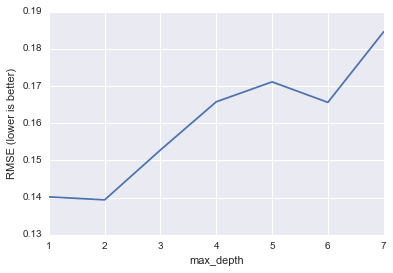

In [787]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [788]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [789]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,BPG,0.514037
1,APG,0.485963
2,GPG,0.000000


In [790]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_training.dot', feature_names=feature_cols)

In [791]:
tree_test = us_stat[(us_stat.Team != 'TEAM USA') & (us_stat.wugc16_tryouts == 1)].groupby('Name').mean().dropna()

In [792]:
tree_test[tree_test.Team_WUGC16 == 1].count()

Number            23
Goal              23
GPG               23
Assist            23
APG               23
Block             23
BPG               23
Turn              23
TPG               23
Games             23
Standing          23
Spirit            23
wg13              23
wugc16_tryouts    23
Team_WUGC16       23
fury              23
riot              23
year              23
dtype: int64

In [793]:
# use fitted model to make predictions on testing data
X_test = tree_test[feature_cols]
y_test = tree_test.wg13
y_pred = treereg.predict(X_test)
y_pred

array([ 0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.33333333,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.33333333,  0.33333333,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624,  0.33333333,  0.01237624,
        0.33333333,  0.01237624,  0.01237624,  0.01237624,  1.        ,
        0.01237624,  0.01237624,  0.01237624,  0.01237624,  0.01237624,
        0.01237624,  0.01237624,  0.01237624])

In [794]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.30273507917674086

In [795]:
tree_test['wugc_predict'] = y_pred

In [796]:
tree_test.sort_values(by='wugc_predict', ascending = False)

,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,wugc_predict
Name,,,,,,,,,,,,,,,,,,,
SANDY JORGENSEN,37.000000,11.000000,1.395503,7.000000,0.896164,11.500000,1.515873,6.000000,0.746032,8.000000,3.666667,0.800000,1,1,0,0.000000,0.000000,2012.000000,1.000000
OCTAVIA PAYNE,9.000000,3.428571,0.455782,14.714286,1.951247,10.000000,1.195767,19.000000,2.291005,7.571429,3.142857,0.726393,1,1,1,0.000000,0.000000,2013.142857,0.333333
JENNY FEY,10.000000,9.800000,1.380952,19.000000,2.583333,3.500000,0.420635,11.500000,1.341270,7.400000,4.600000,0.733100,0,1,1,0.000000,0.000000,2013.200000,0.333333
ROBYN WISEMAN,9.000000,5.250000,0.997024,20.750000,3.687500,9.000000,1.500000,39.000000,6.500000,5.750000,9.750000,0.673625,0,1,0,0.000000,0.000000,2014.250000,0.333333
KATHERINE WOOTEN,24.000000,1.666667,0.266667,13.666667,2.216667,3.000000,0.464286,14.000000,2.083333,6.333333,7.833333,0.620000,0,1,0,0.000000,0.000000,2013.333333,0.333333
KATEY FORTH,11.000000,7.875000,1.137550,14.125000,2.019593,4.000000,0.529762,12.000000,1.589286,7.125000,6.500000,0.685359,0,1,1,0.000000,0.000000,2013.375000,0.333333
MANISHA DARYANI,71.000000,3.375000,0.414435,3.375000,0.440476,0.500000,0.071429,4.500000,0.642857,7.125000,2.000000,0.703089,0,1,0,1.000000,0.000000,2013.750000,0.012376
MEGAN COUSINS,16.000000,2.750000,0.445238,1.250000,0.204762,0.500000,0.071429,0.500000,0.071429,6.000000,7.250000,0.733000,0,1,0,0.000000,0.000000,2013.500000,0.012376
MEG HARRIS,27.500000,4.750000,0.798810,1.750000,0.250000,0.000000,0.000000,0.000000,0.000000,6.000000,7.750000,0.565500,0,1,0,0.000000,0.000000,2014.250000,0.012376


## Clustering

Cluster using all data

In [35]:
us_stat_cluster = us_stat.dropna()
X = us_stat_cluster[['BPG', 'APG', 'GPG']]

In [36]:
# K-means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [37]:
us_stat_cluster['k_cluster'] = km.labels_

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
us_stat_cluster[(us_stat_cluster.k_cluster == 1) & (us_stat_cluster.wugc16_tryouts == 1)].groupby('Name').mean().sort_values(by='k_cluster', ascending=False).describe()

,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,k_cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28,28.000000,28.000000,28.000000,28.00000,28
mean,28.375000,2.083333,0.288832,1.869048,0.253791,1.589286,0.219955,3.255952,0.452168,7.303571,4.458333,0.804150,0.071429,1,0.285714,0.250000,0.214286,2012.77381,1
std,24.283291,1.524491,0.201954,1.677347,0.227614,1.503413,0.212328,2.674942,0.388465,1.012325,3.815882,0.078909,0.262265,0,0.460044,0.440959,0.417855,0.31497,0
min,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.600000,0.000000,1,0.000000,0.000000,0.000000,2012.00000,1
25%,14.250000,1.000000,0.160714,0.500000,0.055556,0.500000,0.069196,1.000000,0.121528,6.500000,2.000000,0.800000,0.000000,1,0.000000,0.000000,0.000000,2012.50000,1
50%,21.500000,2.000000,0.309524,1.166667,0.169643,1.000000,0.166667,2.250000,0.333333,7.000000,2.666667,0.825500,0.000000,1,0.000000,0.000000,0.000000,2013.00000,1
75%,35.750000,3.000000,0.400298,3.000000,0.415179,2.125000,0.295635,5.125000,0.714286,8.000000,7.000000,0.838266,0.000000,1,1.000000,0.250000,0.000000,2013.00000,1
max,91.000000,6.000000,0.666667,6.000000,0.750000,7.000000,1.000000,9.000000,1.333333,9.000000,15.000000,0.887000,1.000000,1,1.000000,1.000000,1.000000,2013.00000,1


In [39]:
us_stat_cluster[(us_stat_cluster.k_cluster == 2) & (us_stat_cluster.wugc16_tryouts == 1)].groupby('Name').mean().sort_values(by='k_cluster', ascending=False).describe()

,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,wg13,wugc16_tryouts,Team_WUGC16,fury,riot,year,k_cluster
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29,29.000000,29.000000,29.000000,29.000000,29
mean,22.310345,3.672414,0.506397,11.068966,1.533365,4.258621,0.600997,10.844828,1.562204,7.270115,4.712644,0.811330,0.137931,1,0.551724,0.275862,0.172414,2012.833333,2
std,23.895761,2.192829,0.310107,3.897628,0.560546,2.313087,0.348774,7.418730,1.200046,1.116626,3.853183,0.052837,0.350931,0,0.506120,0.454859,0.384426,0.302109,0
min,2.000000,0.500000,0.071429,6.000000,0.857143,0.000000,0.000000,1.000000,0.111111,6.000000,1.000000,0.600000,0.000000,1,0.000000,0.000000,0.000000,2012.000000,2
25%,9.000000,2.000000,0.253968,8.000000,1.166667,3.000000,0.333333,6.000000,0.756944,6.000000,1.500000,0.796750,0.000000,1,0.000000,0.000000,0.000000,2012.666667,2
50%,14.000000,4.000000,0.500000,10.000000,1.333333,4.000000,0.571429,10.000000,1.341270,7.000000,3.000000,0.820625,0.000000,1,1.000000,0.000000,0.000000,2013.000000,2
75%,21.000000,5.500000,0.666667,12.500000,1.797619,6.000000,0.702381,14.500000,2.000000,8.000000,7.000000,0.834000,0.000000,1,1.000000,1.000000,0.000000,2013.000000,2
max,88.000000,8.000000,1.142857,20.000000,3.333333,10.000000,1.500000,39.000000,6.500000,9.000000,13.000000,0.888000,1.000000,1,1.000000,1.000000,1.000000,2013.000000,2
